In [1]:
import pandas as pd
import numpy as np

In [2]:

# Importing pandas library
import pandas as pd
 
# Creating and initializing a nested list
age = [['Aman', 95.5, "Male"], ['Sunny', 65.7, "Female"],
       ['Monty', 85.1, "Male"], ['toni', 75.4, "Male"]]
 
# Creating a pandas dataframe
df = pd.DataFrame(age, columns=['Name', 'Marks', 'Gender'])
 
# Printing dataframe
df

,Name,Marks,Gender
0,Aman,95.5,Male
1,Sunny,65.7,Female
2,Monty,85.1,Male
3,toni,75.4,Male


In [3]:
df=pd.read_csv("Data.csv")

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df.shape

(10, 4)

In [6]:
df.size

40

In [7]:
df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [8]:
X = df.iloc[:,0:3].values
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


In [9]:
#Handling Missing values  #Numerical data
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
imputer.fit(X[:,1:3])
X[:, 1:3] = imputer.transform(X[:,1:3])
print(X)

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


In [10]:
#Handling Missing values  #Numerical data
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='constant', fill_value=5)
imputer.fit(X[:,1:3])
X[:, 1:3] = imputer.transform(X[:,1:3])
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


In [11]:
#Handling categorical data
# label Encoding #dependent variable Purchased
Y = df.iloc[:,3].values
print(Y)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)
print(Y)


['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']
[0 1 0 0 1 1 0 1 0 1]


In [12]:
"""#Handling categorical data
# label Encoding #Country
Y = df.iloc[:,0].values
print(Y)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)
print(Y)"""

'#Handling categorical data\n# label Encoding #Country\nY = df.iloc[:,0].values\nprint(Y)\nfrom sklearn.preprocessing import LabelEncoder\nle = LabelEncoder()\nY = le.fit_transform(Y)\nprint(Y)'

In [13]:
#Handling categorical data
# OneHot Encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X)

[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


In [14]:
#Split the dataset into test and train set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)
print("\n")
print(X_train)
print("\n")
print(Y_train)
print("\n")
print(X_test)
print("\n")
print(Y_test)



[[0.0 0.0 1.0 38.77777777777778 52000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 35.0 58000.0]]


[0 1 0 0 1 1 0 1]


[[0.0 1.0 0.0 30.0 54000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


[0 1]


In [15]:
#Feature Scaling. StandardScaler standardizes a feature by subtracting the mean 
# and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])
print(X_train)
X_test[:, 3:] = sc.transform(X_test[:, 3:])

[[0.0 0.0 1.0 -0.19159184384578545 -1.0781259408412425]
 [0.0 1.0 0.0 -0.014117293757057777 -0.07013167641635372]
 [1.0 0.0 0.0 0.566708506533324 0.633562432710455]
 [0.0 0.0 1.0 -0.30453019390224867 -0.30786617274297867]
 [0.0 0.0 1.0 -1.9018011447007988 -1.420463615551582]
 [1.0 0.0 0.0 1.1475343068237058 1.232653363453549]
 [0.0 1.0 0.0 1.4379472069688968 1.5749910381638885]
 [1.0 0.0 0.0 -0.7401495441200351 -0.5646194287757332]]


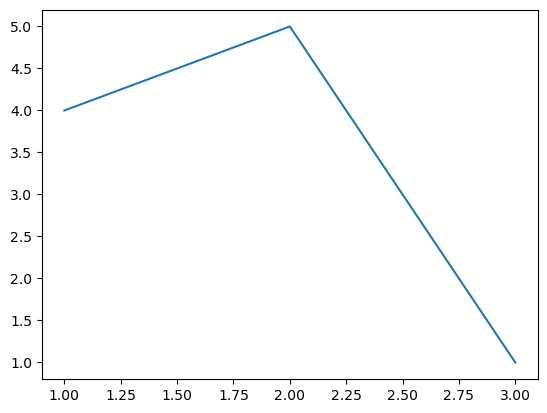

In [16]:
#line chart or linear plot
from matplotlib import pyplot as plt
plt.plot([1,2,3],[4,5,1])
plt.show()



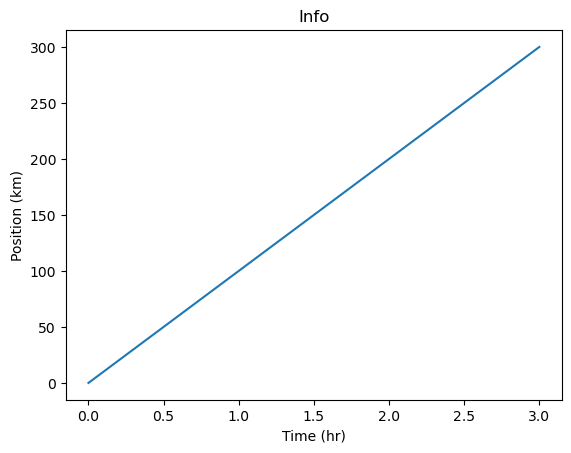

In [17]:
#line Chart
time = [0, 1, 2, 3]
position = [0, 100, 200, 300]
plt.plot(time, position)
plt.title('Info')
plt.xlabel('Time (hr)')
plt.ylabel('Position (km)')
plt.show()

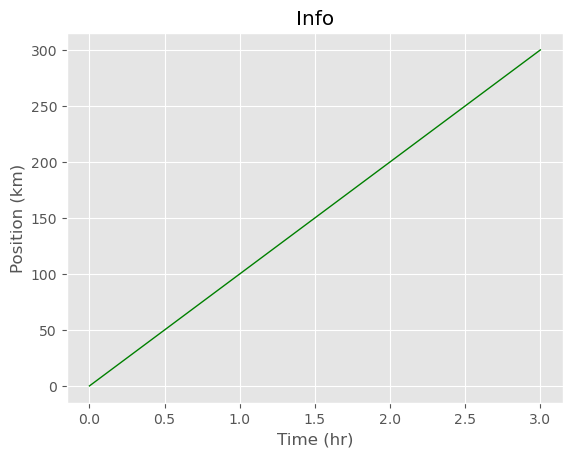

In [18]:
#line chart with grids
from matplotlib import style 
style.use('ggplot')
time = [0, 1, 2, 3]
position = [0, 100, 200, 300]
plt.plot(time, position,'g',label='line2', linewidth=1)
plt.title('Info')
plt.xlabel('Time (hr)')
plt.ylabel('Position (km)')
#plt.legend()
#plt.grid(True,color='k')
plt.show()

<BarContainer object of 4 artists>

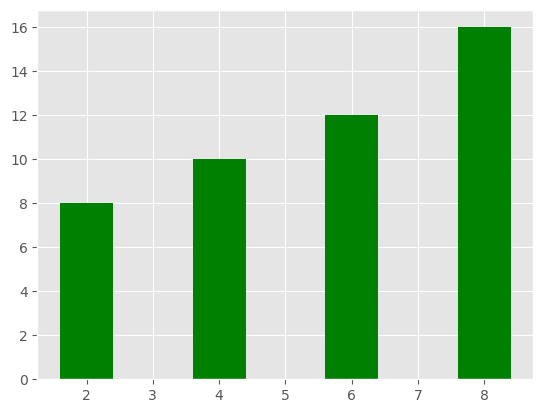

In [19]:
#Bar plot, Bar plots are used to compare categorical values. likes GDP of each city of a country
plt.bar([2,4,6,8],[8,10,12,16], label='example1',color='g')

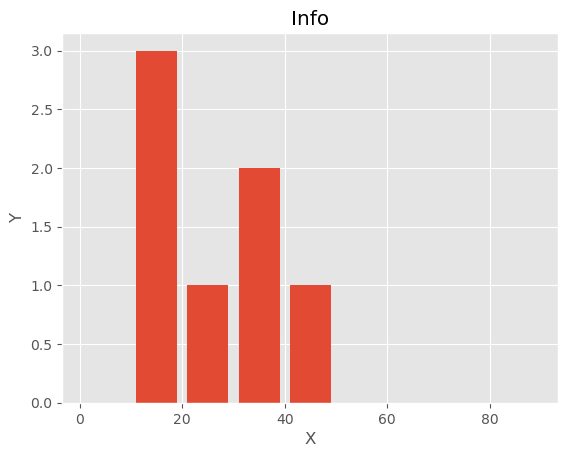

In [20]:
#Histogram plot. Histrograms are used to compare quantitative variables. Like Age groups.
population_ages=[10,20,30,35,40,15,112,115,16,190,200]
bins=[0,10,20,30,40,50,60,70,80,90]
plt.hist(population_ages,bins, histtype='bar',rwidth=0.8)
plt.title('Info')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


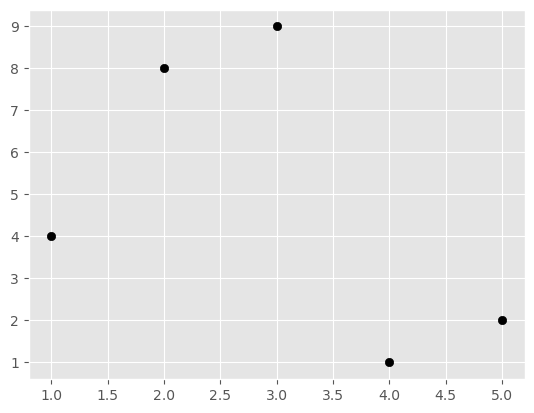

In [21]:
#scatter plot.
#scatter plots are used to compare two variable in 2D or 3 variables in 3D looking for finding correlation between variables.
x=[1,2,3,4,5]
y=[4,8,9,1,2]
plt.scatter(x,y,label='skitscat',color='k')
plt.show()

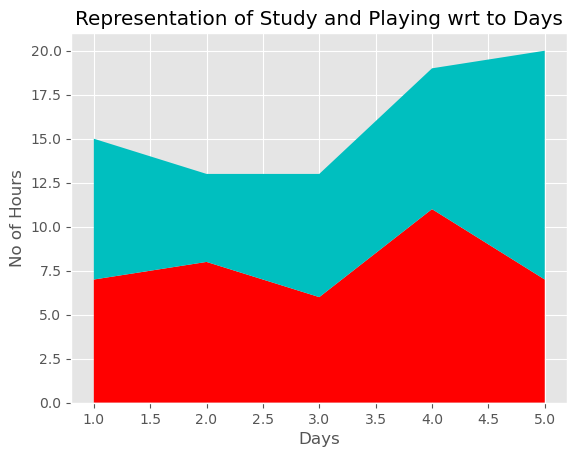

In [22]:
#Stackplot. To track changes over time in two or more relative group which make up a single category. 
# List of Days
days = [1, 2, 3, 4, 5]
  
# No of Study Hours
Studying = [7, 8, 6, 11, 7]
  
# No of Playing Hours
playing =  [8, 5, 7, 8, 13]
  
# Stackplot with X, Y, colors value
plt.stackplot(days, Studying, playing,
              colors =['r', 'c'])
# Days
plt.xlabel('Days')
  
# No of hours
plt.ylabel('No of Hours')
  
# Title of Graph
plt.title('Representation of Study and \
Playing wrt to Days')
  
# Displaying Graph
plt.show()